<a href="https://colab.research.google.com/github/majuzabbal/DogsCatsTensorFlow/blob/main/Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconhecimento de Imagens com Redes Neurais

Neste notebook, criaremos Rede Neural Convolucional para aprender recursos de imagens e assim prever se uma imagem contém um cachorro ou um gato, para este trabalho usaremos linguagem Python com Keras e TensorFlow.

O nosso dataset contém:  2.000 imagens  para o conjunto de treinamento, 1.000 imagens de cães e gatos para validação do treinamento e 1.000 imagens de cães e gatos para teste. Este é um daaset muito famoso do Kaggle (https://www.kaggle.com/c/dogs-vs-cats/data).

Seguiremos os seguintes passos:
1. Visualização de Dados
2. Construção da Rede Neural Convolucional
3. Treinamento
4. Previsão

A Rede Neural Convolucional é composta por camadas e podemos usar o modelo sequencial oferecido pelo Keras, que possui as funções necessárias para construir cada uma dessas camadas.

O Keras utiliza o TensorFlow como backend, pois na prática o Keras é apenas uma biblioteca para simplificar a complexidade do TensorFlow.

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [ ]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

Usaremos 32 features para um array 2D e definiremos nosso array como o formato 3x3.

Converteremos todas as nossas imagens 64x64 pixels em um array 3D (pois as imagens são coloridas com 3 canais de cores).

In [ ]:
# Passo 1 - Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [ ]:
# Passo 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

In [ ]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

Agora aplicamos o "achatamento" ou apenas Flatten para converter a estrutura de dados 2D resultado da camada anterior em uma estrutura 1D, ou seja, um vetor.

In [ ]:
# Passo 3 - Flattening
classifier.add(Flatten())

In [ ]:
# Passo 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))


Para compilar a rede, usamos o otimizador "Adam", um excelente algoritmo de primeira ordem para otimização baseada em gradiente de funções objetivas estocásticas, que toma como base uma estimativa adaptada de momentos de baixa ordem.

Usamos uma função log loss com "entropia binária cruzada", pois ela funciona bem com funções sigmóides. Nossa métrica será a acurácia, pois essa é nossa maior preocupação no treinamento deste tipo de modelo.

In [ ]:
# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-07-29 13:21:41--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  61.3MB/s    in 1.1s    

2021-07-29 13:21:42 (61.3 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
# Criando os objetos train_datagen e validation_datagen com as regras de pré-processamento das imagens
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Pré-processamento das imagens de treino e validação
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 20,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory(validation_dir,
                                                        target_size = (64, 64),
                                                        batch_size = 20,
                                                        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Executando o treinamento (esse processo pode levar bastante tempo, dependendo do seu computador)
classifier.fit(training_set,
                steps_per_epoch = 100,
                epochs = 10,
                validation_data = validation_set,
                validation_steps = 50)

Epoch 1/10
100/100 [==============================] - 15s 149ms/step - loss: 0.3937 - accuracy: 0.8190
Epoch 2/10
100/100 [==============================] - 15s 148ms/step - loss: 0.3697 - accuracy: 0.8345
Epoch 3/10
100/100 [==============================] - 15s 148ms/step - loss: 0.3647 - accuracy: 0.8305
Epoch 4/10
100/100 [==============================] - 15s 149ms/step - loss: 0.3428 - accuracy: 0.8520
Epoch 5/10
100/100 [==============================] - 15s 150ms/step - loss: 0.3330 - accuracy: 0.8550
Epoch 6/10
100/100 [==============================] - 15s 150ms/step - loss: 0.3136 - accuracy: 0.8645
Epoch 7/10
100/100 [==============================] - 15s 149ms/step - loss: 0.3205 - accuracy: 0.8600
Epoch 8/10
100/100 [==============================] - 15s 150ms/step - loss: 0.3080 - accuracy: 0.8635
Epoch 9/10
100/100 [==============================] - 15s 149ms/step - loss: 0.2821 - accuracy: 0.8830
Epoch 10/10
100/100 [==============================] - 15s 150ms/step - l

Fazendo previsões: Vamos agora testar nosso modelo treinado com imagens que ele ainda não viu e que estão nos dados de teste.

Para cada imagem de teste, carregamos as imagens com as mesmas dimensões usadas nas imagens de treino. Na sequência convertemos as imagens em um array e expandimos as dimensões. Então apresentamos as imagens ao classificador treinado nos passos anteriores. Por fim, verificamos o resultado da previsão e emitimos a informação se a imagem é de um gato ou cachorro.

In [ ]:
from google.colab import files

def get_image():
  test_image = files.upload()

  for fn in test_image.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(test_image[fn])))
    image_name = fn
  
  return image_name

Saving cat.9741.jpg to cat.9741.jpg
User uploaded file "cat.9741.jpg" with length 23295 bytes


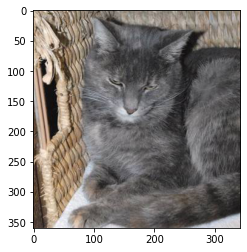

In [ ]:
#Primeira Imagem
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_name = get_image()
test_image = image.load_img(image_name, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'

img = mpimg.imread(image_name)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# Previsão da primeira imagem
prediction

'Gato'

Saving cat.9989.jpg to cat.9989 (1).jpg
User uploaded file "cat.9989.jpg" with length 45388 bytes


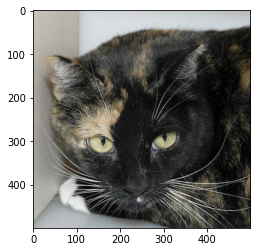

In [ ]:
# Segunda Imagem
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_name = get_image()
test_image = image.load_img(image_name, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'

img = mpimg.imread(image_name)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# Previsão da segunda imagem
prediction

'Cachorro'

Saving 2749.jpg to 2749.jpg
User uploaded file "2749.jpg" with length 14621 bytes


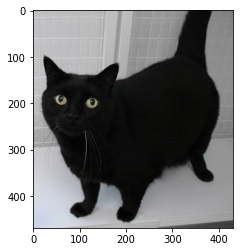

In [ ]:
# Terceira Imagem
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_name = get_image()
test_image = image.load_img(image_name, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'

img = mpimg.imread(image_name)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# Previsão da terceira imagem
prediction

'Gato'

Conclusão: Obteve-se um resultado final de 88,70% de precisão para o nosso conjunto de treino, acertando 2 de 3 testes durante a previsão.

Esse código é uma adaptação para estudos do https://www.deeplearningbook.com.br/